In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

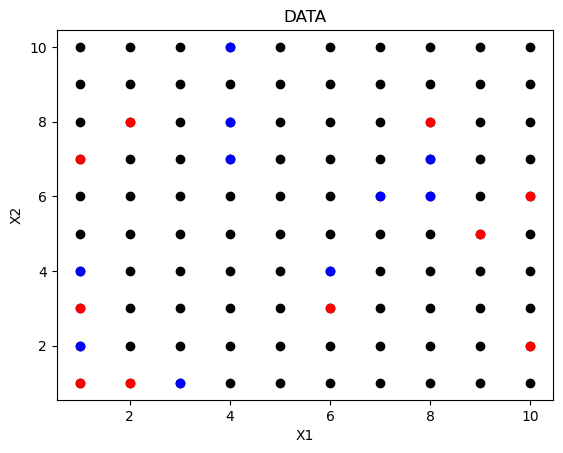

In [2]:
#(a)

n=10
X=np.linspace(1,10,n)
x1,y1=np.meshgrid(X,X)

#defining dataset
data=np.column_stack([x1.ravel(),y1.ravel()])

#choosing indexes at random
A_index=np.random.choice(n*n,size=10,replace=False)
A_points=data[A_index]

B_index=np.random.choice(n*n,size=10,replace=False)
B_points=data[B_index]

# Plot the grid points
plt.scatter(data[:, 0], data[:, 1], color='black', label='Validation Data')
plt.scatter(A_points[:, 0], A_points[:, 1], color='red', label='Class A')
plt.scatter(B_points[:, 0], B_points[:, 1], color='blue', label='Class B')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('DATA')
plt.show()


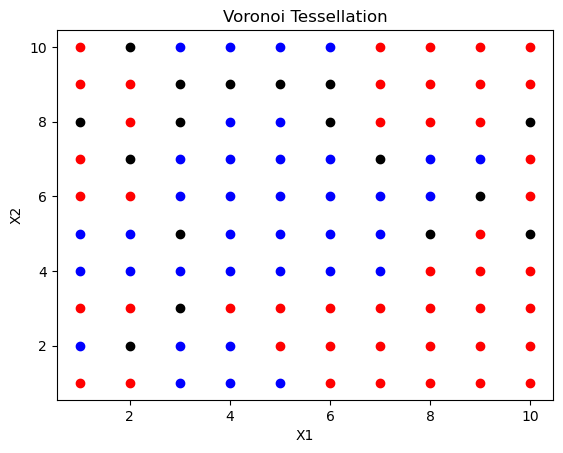

Test sample is neutral.


In [7]:
#(b)VORONOI TESSELATION

#creating validation set
validation=[]
for i in range(len(data)):
    if (i not in A_index) and (i not in B_index):
        validation.append(data[i])

#voronoi tesselation
for point in validation:
    distances = np.linalg.norm(point - np.concatenate((A_points, B_points)), axis=1)
    min_index = np.argmin(distances)
    if distances[min_index] == distances[np.argsort(distances)[1]]:
        color='black'
    else:
        if min_index < len(A_points):
            color = 'red'
        else:
            color = 'blue' 
    plt.scatter(point[0], point[1], color=color)

plt.scatter(A_points[:, 0], A_points[:, 1], color='red', label='Class A')
plt.scatter(B_points[:, 0], B_points[:, 1], color='blue', label='Class B')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Voronoi Tessellation')
plt.show()

# Taking input test sample from the user
test_sample = np.array(input("Enter the test sample coordinates (e.g., x1,x2): ").split(','), dtype=float)
distances = np.linalg.norm(test_sample - np.concatenate((A_points, B_points)), axis=1)
min_index = np.argmin(distances)
if distances[min_index] == distances[np.argsort(distances)[1]]:
    print("Test sample is neutral.")
else:
    if min_index < len(A_points):
        predicted_class = 'A'
    else:
        predicted_class = 'B'
    print("Predicted class for the test sample is:", predicted_class)


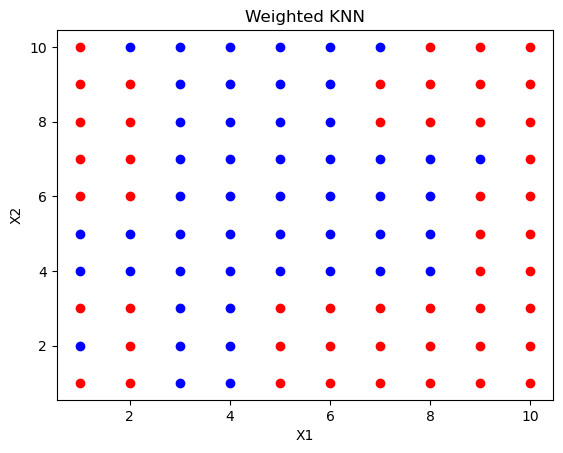

In [13]:
#(c) weighted KNN with k=3
k=3
for point in validation:
    distances = np.linalg.norm(point - np.concatenate((A_points, B_points)), axis=1)
    closest_indices = np.argsort(distances)[:k]
    weights = 1 / (distances[closest_indices] ** 2)
    class_A_weight = 0
    class_B_weight = 0
    j=0
    for i in closest_indices:
        if i<len(A_points):
            class_A_weight+=weights[j]
        else:
            class_B_weight+=weights[j]
        j+=1
    if class_A_weight > class_B_weight:
        color = 'red'
    else:
        color = 'blue'
    plt.scatter(point[0], point[1], color=color)

plt.scatter(A_points[:, 0], A_points[:, 1], color='red', label='Class A')
plt.scatter(B_points[:, 0], B_points[:, 1], color='blue', label='Class B')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Weighted KNN')
plt.show()